In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

import sys
sys.path.insert(0, '..')
import utils.dataloader as dataloader
import utils.new_dataloader as new_dataloader

In [2]:
train, eval, test = new_dataloader.getCustomerData('../../data/load1011.csv','../../data/load1112.csv','../../data/load1213.csv','../../data/price_wo_outlier.csv', 1)

<Axes: >

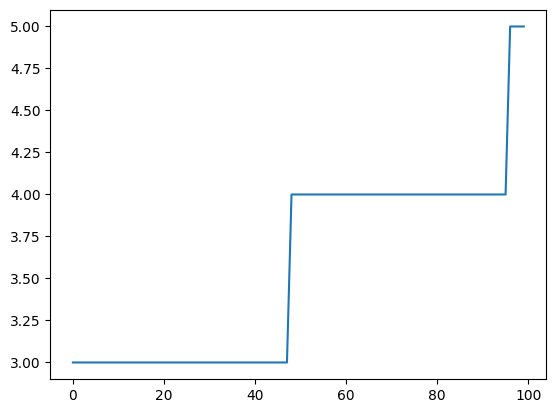

In [34]:
load_pv_data, electricity_prices, electricity_prices_scaled = train
load_pv_data.iloc[0:100,0].plot()

<Axes: >

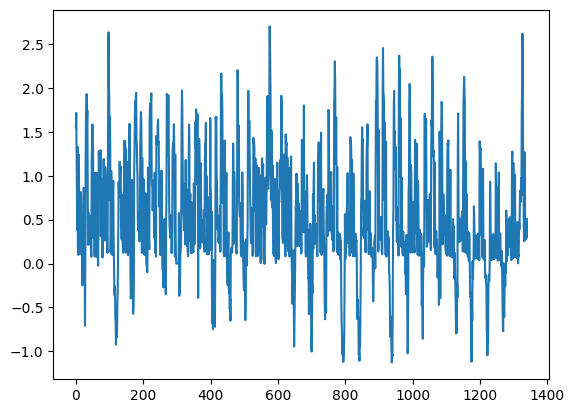

In [23]:
(load_pv_data[1]-load_pv_data[2]).iloc[0:335*4].plot()

<Axes: >

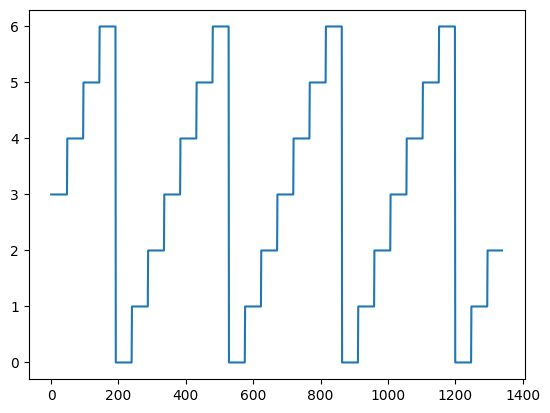

In [24]:
load_pv_data[0].iloc[0:335*4].plot()

<Axes: >

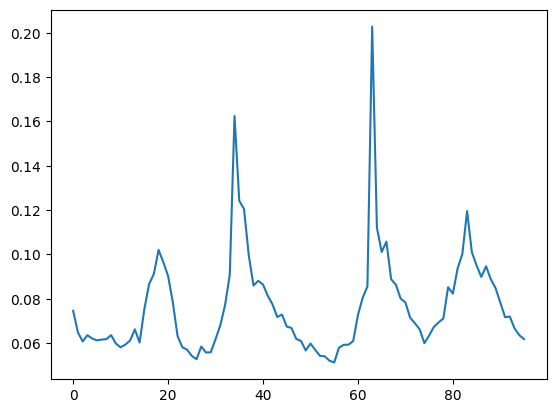

In [14]:
pd.DataFrame(electricity_prices)[0].iloc[0:96].plot()

In [ ]:
def plotCSV(csv, startSlot, endSlot):
    action = pd.read_csv(csv, header=0)
    action = action.drop(columns=['Wall time', 'Step'])
    plot_values = np.zeros(endSlot - startSlot)
    counter = 0

    for i in range(startSlot, endSlot):
        plot_values[counter] = action.iloc[i][0]
        counter += 1

    xpoints = np.arange(startSlot, endSlot)
    ypoints = plot_values
    fig = plt.figure()
    plt.rcParams.update({'font.size': 15})
    plt.plot(xpoints, ypoints)
    plt.xlabel(xlabel='Timeslot')
    plt.ylabel(ylabel='kWh')
    plt.title('Energy Leftover')
    plt.xticks(np.arange(startSlot, endSlot, 5000))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig.savefig('plots/13_left_full.pdf')


def plotCSVAverage(csv):
    action = pd.read_csv(csv, header=0)
    action = action.drop(columns=['Wall time', 'Step'])
    # plot_values = np.zeros(48)
    plot_values = action.to_numpy()
    # for i in range(0, 15720):
    #     plot_values[i%48] += action.iloc[i][0]
    #
    # xpoints = np.arange(0, 17520)
    ypoints = np.percentile(plot_values, 80)
    print(ypoints)

    # fig = plt.figure()
    # plt.rcParams.update({'font.size': 15})
    # plt.plot(xpoints, ypoints)
    # plt.xlabel(xlabel='Timeslot')
    # plt.ylabel(ylabel='kWh')
    # plt.title('SoE')
    # # plt.xticks(np.arange(0, 48, 16))
    # plt.grid(True)
    # plt.show()
    # fig.savefig('plots/1_s.pdf', bbox_inches='tight')


def plotCSVPercentile(csv):
    percintile = np.arange(0, 100, 1)
    action = pd.read_csv(csv, header=0)
    action = action.drop(columns=['Wall time', 'Step'])
    for p in percintile:
        print('{0}: {1}'.format(p, np.percentile(np.absolute(action.to_numpy()), p)))


def plotPercentile(customer):
    data = dataloader.get_customer_data(dataloader.loadData('../../data/load1213.csv'),
                                        dataloader.loadPrice('../../data/price.csv'), customer)
    pv = data[1].drop(columns=['Row Quality']).to_numpy()
    percintile = [1, 5, 10, 80, 85, 90, 95, 99]
    # for p in percintile:
    print(np.percentile(pv, 82))


def plotPrice(startSlot, endSlot):
    data = dataloader.get_customer_data(dataloader.loadData('../../data/load1213.csv'),
                                        dataloader.loadPrice('../../data/price.csv'), 1)
    price = data[2]
    plot_values = np.zeros(endSlot - startSlot)
    counter = 0

    for i in range(startSlot, endSlot):
        plot_values[counter] = price.iloc[i][0]
        counter += 1

    xpoints = np.arange(startSlot, endSlot)
    ypoints = plot_values
    fig = plt.figure()
    plt.rcParams.update({'font.size': 15})
    plt.plot(xpoints, ypoints)
    plt.xlabel(xlabel='Timeslot')
    plt.ylabel(ylabel='$/kWh')
    plt.title('Price')
    plt.xticks(np.arange(startSlot, endSlot, 5000))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig.savefig('../../images/price.pdf')


def plotLoad(csv, startSlot, endSlot):
    load = pd.read_csv(csv, header=0)
    load = load.drop(columns=['Wall time', 'Step'])
    plot_values = np.zeros(endSlot - startSlot)
    counter = 0

    for i in range(startSlot, endSlot):
        plot_values[counter] = load.iloc[i][0]
        counter += 1

    xpoints = np.arange(startSlot, endSlot)
    ypoints = plot_values
    fig = plt.figure()
    plt.plot(xpoints, ypoints)
    plt.xlabel(xlabel='Timeslot')
    plt.ylabel(ylabel='kWh')
    plt.title('Load')
    plt.xticks(np.arange(startSlot, endSlot, 6))
    plt.grid(True)
    plt.show()
    fig.savefig('../../images/1_ex_load.pdf')


def plotAverageLoad(customer):
    data = dataloader.get_customer_data(dataloader.loadData('../../data/load1213.csv'),
                                        dataloader.loadPrice('../../data/price.csv'), customer)
    load = data[0].drop(columns=['Row Quality'])
    times = []
    for t in load.columns:
        times.append(dt.datetime.strptime(t, '%H:%M').time())
    plot_values = pd.DataFrame(times)
    plot_values = load.sum() / 365
    fig = plt.figure()
    plot_values.plot()
    plt.xlabel(xlabel='Timeslot', fontsize=15)
    plt.ylabel(ylabel='kWh', fontsize=15)
    plt.title('Average Load', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig.savefig('../../images/average_load_1.pdf')


def plotAveragePrice():
    data = dataloader.get_customer_data(dataloader.loadData('../../data/load1213.csv'),
                                        dataloader.loadPrice('../../data/price.csv'), 1)

    price = data[2]
    plot_values = np.zeros(48)

    for i in range(0, 17520):
        plot_values[i % 48] += price.iloc[i][0]

    xpoints = np.arange(0, 48)
    ypoints = plot_values / 365
    fig = plt.figure()
    plt.plot(xpoints, ypoints)
    plt.xlabel(xlabel='Timeslot', fontsize=15)
    plt.ylabel(ylabel='$/kWh', fontsize=15)
    plt.title('Average Price', fontsize=15)
    plt.xticks(np.arange(0, 48, 6), fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)
    plt.show()
    fig.savefig('../../images/average_price.pdf')

In [ ]:
plotCSVPercentile('../../images/1_left.csv')

In [ ]:
plotCSV('../../images/13_left.csv',0,17520)

In [ ]:
plotAverageLoad(1)

In [ ]:
plotPrice(0, 17520)

In [ ]:
plotPrice(4800,4848)